# Test - Notebook.

En esta notebook se buscara predecir comentarios que se generaron utilizando una herramienta de AI, esto se realizo como un paso mas para testear la performance del modelo y el pipeline generado.

# Imports

In [1]:
from src.comment_analyzer import Comment_Analyzer
import pandas as pd

# Predicciones y prueba de modelo.

In [2]:
# Declaro paths en donde tengo la data simulada, el modelo entrenado y el vectorizador entrenado.
path_data_simulada = './data/simulada/'
name_data_simulada = path_data_simulada + 'test_comments.csv'
output_path = path_data_simulada + '/predicciones/predicciones_test_comments.csv'

path_to_model = './models/'
name_model = path_to_model + 'comment_sentiment_analysis_model.pkl'
name_vectorizer = path_to_model + 'word_vectorizer/fit_count_vectorizer.pkl'

In [3]:
# Instancio la clase, y declaro variables, paths de donde se encuentra
# la data y los modelos.
analyzer_instance = Comment_Analyzer(
    path_to_comments=name_data_simulada,
    vectorizer_path=name_vectorizer,
    model_path=name_model,
    output_path=output_path
)

Cantidad de registros sin contenido = 5
Cantidad de registros sin titulo = 15
Cargando stop words...
Vectorizador cargado correctamente...
Modelo cargado correctamente...
LGBMClassifier(max_depth=5, min_child_samples=5, min_data_in_leaf=10,
               min_split_gain=0.3, n_jobs=-1, num_leaves=20, random_state=24)
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=10


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juanb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# En el atributo de clase .'raw_data' accedemos a la data cruda y cargada.
raw_data = analyzer_instance.raw_data

# Vemos alguna informacion.
print(raw_data.shape)
print(raw_data['target'].value_counts())
raw_data.sample(5)

(315, 3)
target
0    107
1    104
2    104
Name: count, dtype: int64


,title,content,target
142,,"Producto robusto y resistente, realmente muy b...",1
16,Muy malo,"Llegó defectuoso, no lo recomiendo.",0
264,Calidad y precio,"Está bien, pero podría ser mejor.",1
61,Bueno,"La calidad es justa, cumple lo básico.",1
178,Muy bueno,"Muy lindo diseño, funciona excelente.",2


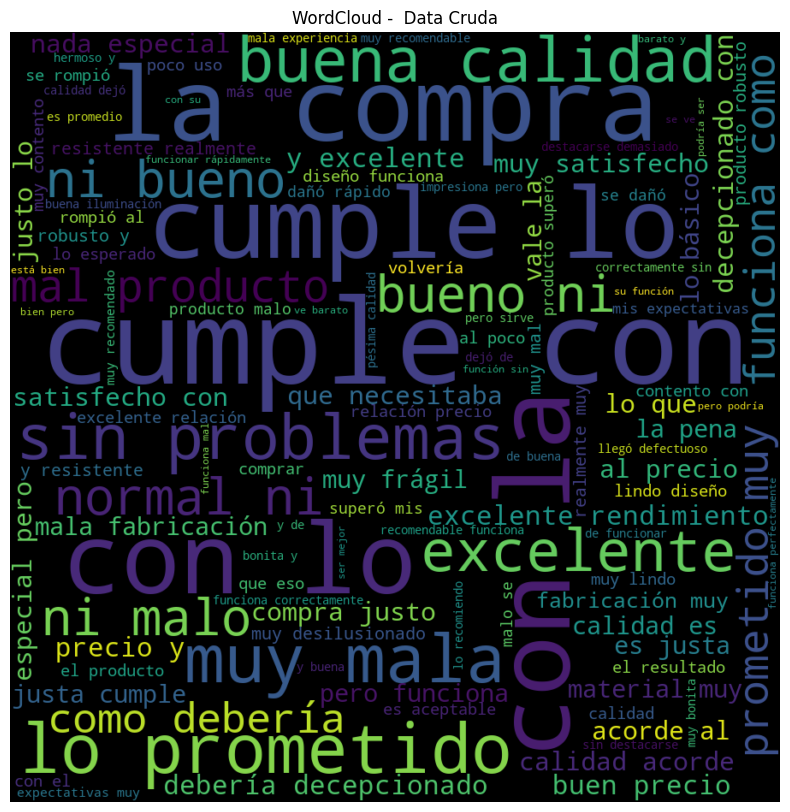

In [5]:
# Utilizamos el metodo de word_cloud para ver como estan distribudas las ocurrencias
# de palabras.
analyzer_instance.return_word_cloud(on_data='raw')

In [6]:
# En el atributo de clase 'clean_data' tenemos la data limpia.
# donde se removieron stopwords y ruido.
clean_data = analyzer_instance.clean_data
clean_data.sample(5)

,title,content,target,text_label
112,Muy malo,"Muy mala calidad, se rompió al poco uso.",0,mal mal calid rompi uso
123,Muy bueno,Buen precio y excelente rendimiento.,2,buen buen preci excelent rendimient
187,Bueno,"Funciona correctamente, sin destacarse demasiado.",1,buen funcion correct destac demasi
234,Bueno,"La calidad es justa, cumple lo básico.",1,buen calid just cumpl basic
199,Bueno,"Es aceptable, no más que eso.",1,buen acept mas


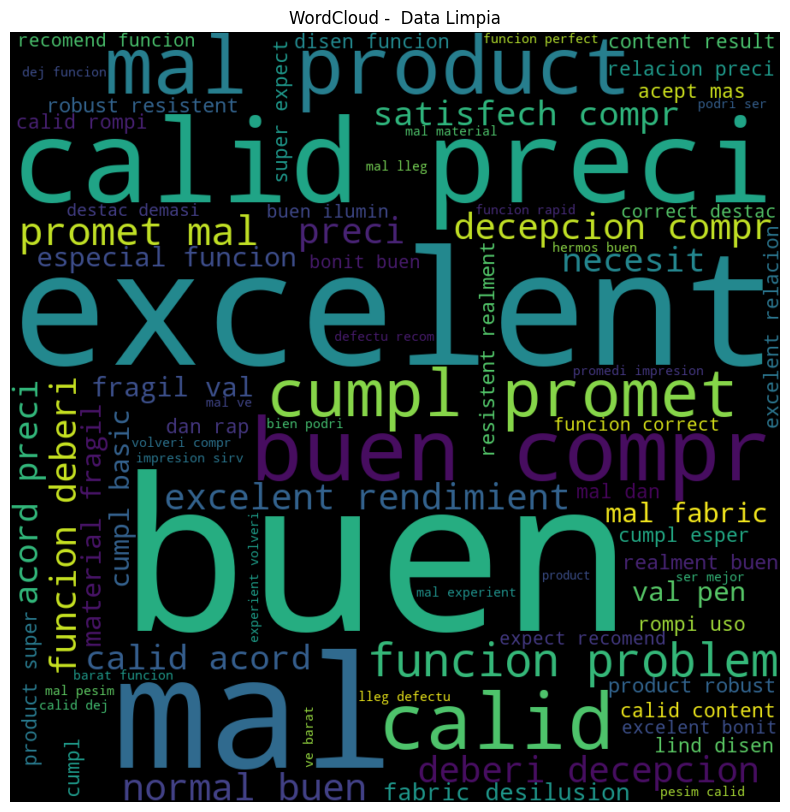

In [7]:
#Utilizo el metodo para generar la word cloud en la data cruda.
analyzer_instance.return_word_cloud(on_data='clean')

In [8]:
# Visualizamos la data procesada.
analyzer_instance.processed_data.sample(5)

,abaj,abaj no,abast,abiert,abiert esper,abrazader,abrazader instal,abrazader no,abrir,abrir mas,...,wifi,wifi alumbr,zapat,zapat circul,zebr,zebr adquiri,zon,zon utiliz,zumb,zumb conect
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


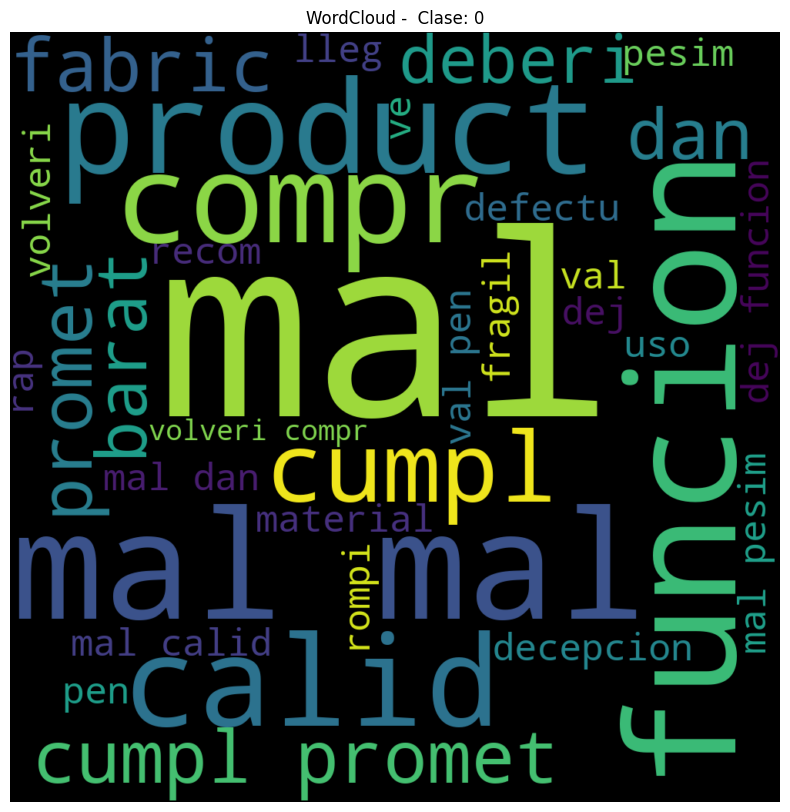

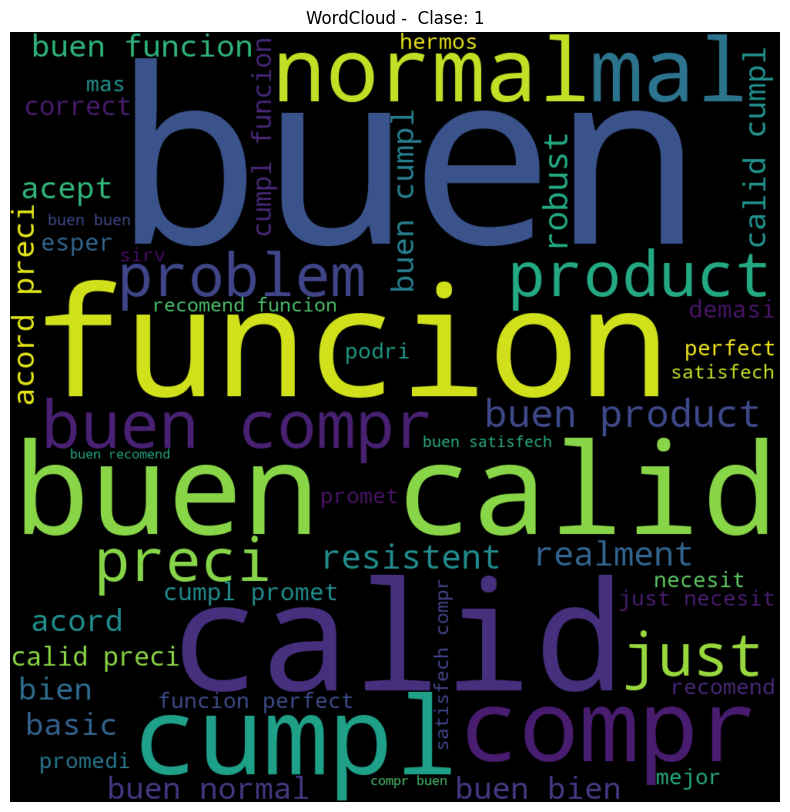

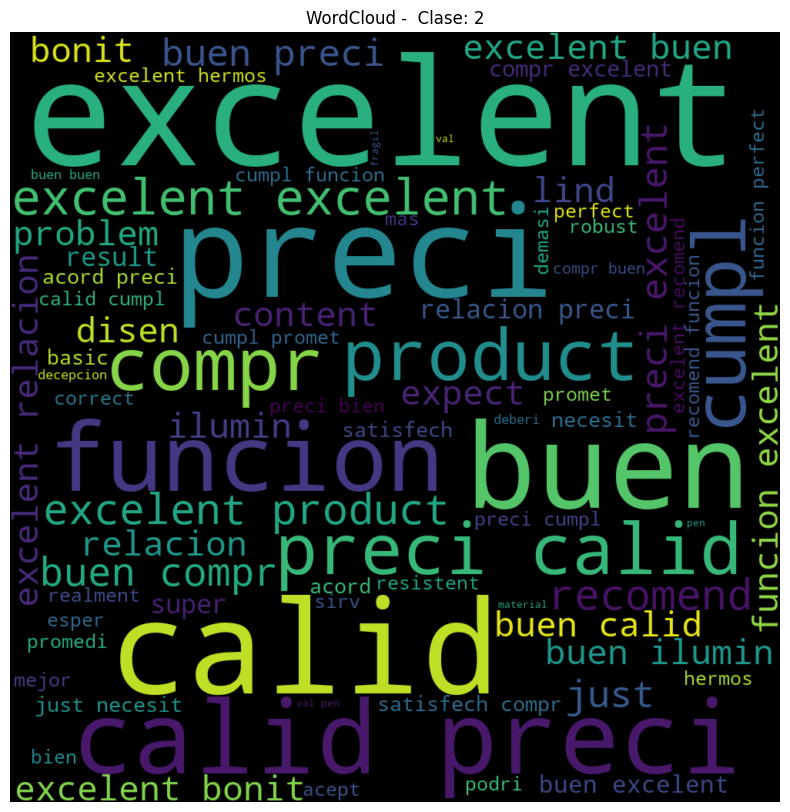

In [9]:
# Vemos por clase como estan distribuidas las palabras para ver si tienen sentido
# o si se puede interpretar las predicciones.
analyzer_instance.return_word_cloud(on_data='predicted')

In [10]:
pd.Series(analyzer_instance.predictions).value_counts()

2    129
0    102
1     84
Name: count, dtype: int64

In [11]:
clean_data['predicted_target'] = analyzer_instance.predictions

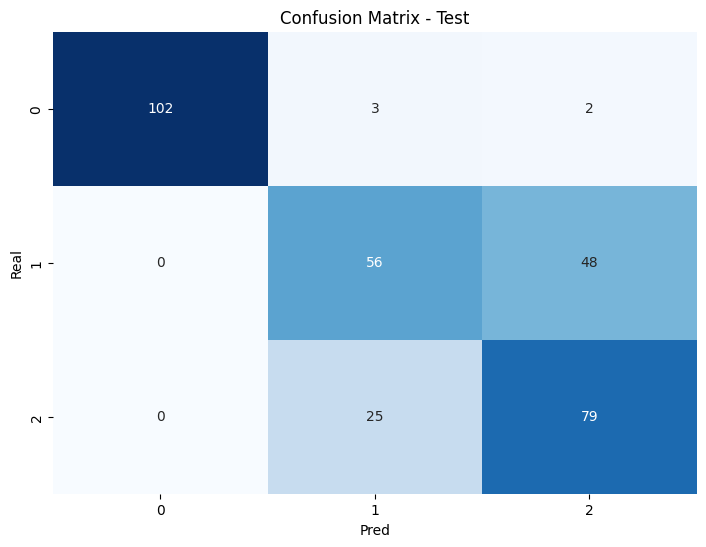

In [ ]:
# Ya que la data cruda tiene la data labeleada voy a ver como performa el modelo
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(
    clean_data['target'],
    clean_data['predicted_target']
)

plt.figure(figsize=(8.3,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Pred")
plt.ylabel("Real")
plt.title("Confusion Matrix - Test")
plt.show()

In [ ]:
from src.comment_analyzer import Comment_Analyzer

analyzer = Comment_Analyzer(
    path_to_comments='data/simulada/test_comments.csv',
    vectorizer_path='models/word_vectorizer/fit_count_vectorizer.pkl',
    model_path='models/comment_sentiment_analysis_model.pkl',
    output_path='data/simulada/predicciones/predicciones_test_comments.csv'
)

# Predicciones.
analyzer.predictions

# Nube de palabras segun clase predicha.
analyzer.return_word_cloud(on_data='predicted')